In [1]:
import pandas as pd

import sys 
sys.path.append('..')
from part2.search_yt import YT_searcher
YT = YT_searcher() 
from part1.title_builder2 import build_subtitles 

from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
plt.style.use('seaborn')
import numpy as np

Ngrams base loaded


# Search in YouTube for subtitles

In [2]:
yt_to_download = 'CIfsB_EYsVI'  # Professor`s
# yt_to_download = 'vQ_ifavFBkI'

search = 'deep learning for life'
if yt_to_download:
    dfs = YT.download_subtitles(yt_to_download)
else:
    ids, dfs = YT.search(search, 2)

## We searched max 2 results and taking a longest

In [3]:
dfs[0]

,text,start,duration
0,"- Okay, sounds like it is.",8.407,1.914
1,I'll be telling you about\nadversarial examples,10.321,2.129
2,and adversarial training today.,12.450,2.842
3,Thank you.,15.292,0.833
4,"As an overview, I will\nstart off by telling you",18.100,2.506
...,...,...,...
1848,"Yeah, okay.",4880.087,0.917
1849,- [Man] So we're actually\ngoing to [mumbles].,4881.868,1.805
1850,"So if you guys need to leave, that's fine.",4883.673,2.422
1851,But let's thank our speaker one more time,4886.095,2.080


### Frequency calculation
> The algorithm calculates the frequency of words in documents and divides it by the frequency from the Google ngrams database. To calculate the important points for our document. Create a large table with the size of the number of tokens X the number of words.
Then, using the "window", we calculate the frequency of words in the window segment. At the output, we get several tables with frequencies, and the most popular words.

In [4]:
data = build_subtitles([list(dfs[0]['text'])], window=100, max_words=10, parse_text_parts=True)

Parsing ngrams frequencies words. part 3 of 7          
 0 with problems (carlini's)
 0 with problems (resnets)
 0 with problems (googlenet)
 0 with problems (clarifai)
 Done                
Documents analysis is Done                                     


In [183]:
data[0].keys()

dict_keys(['app_freq', 'app_freq_f', 'most_app', 'most_words', 'text_part', 'text_part_pos'])

### Algorith calculate frequency and divide it by frequency from Google-ngrams (TF IDF)

<AxesSubplot:>

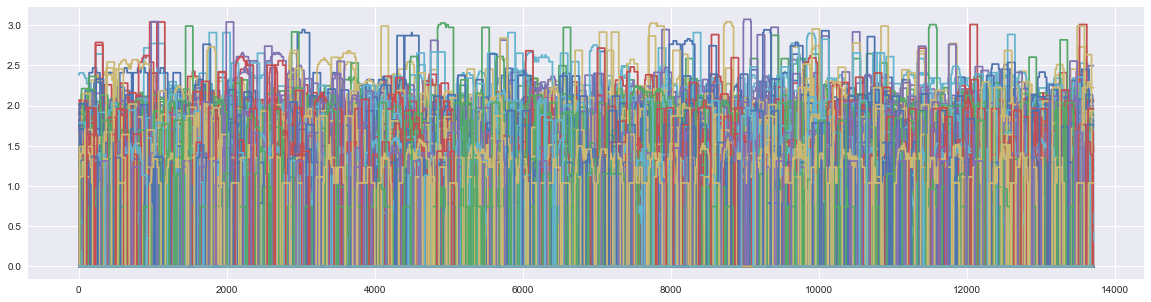

In [5]:
data[0]['app_freq'].plot(figsize=(20, 5), legend=None)

<AxesSubplot:>

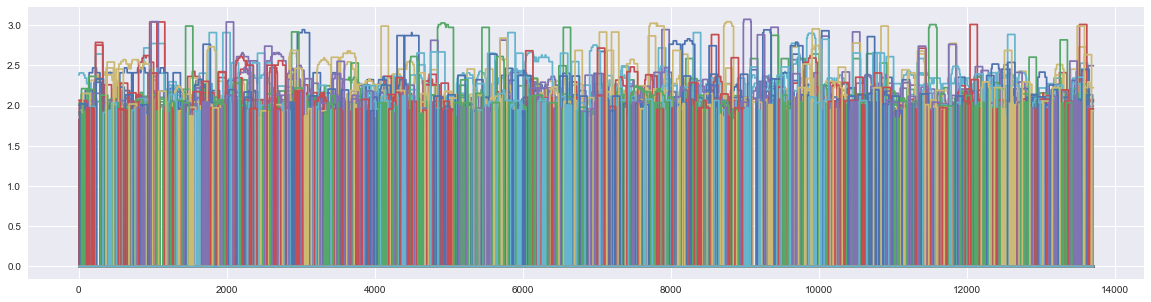

In [6]:
data[0]['app_freq_f'].plot(figsize=(20, 5), legend=None)

In [93]:
data[0]['app_freq'].round(3)

,0,02,1,10,12,a,about,action,actions,actual,...,works,would,wrap,yet,you,you'll,you're,you've,your,zero
0,0.0,0.0,0.0,0.0,0.0,1.146,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,6.198,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,1.146,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,6.198,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,1.146,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,6.198,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,1.146,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,6.198,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,1.146,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,6.198,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,0.0,0.0,0.0,0.0,0.0,0.539,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.436,0.0,5.159,0.000,2.71,0.0
2227,0.0,0.0,0.0,0.0,0.0,0.539,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.436,0.0,5.159,0.000,2.71,0.0
2228,0.0,0.0,0.0,0.0,0.0,0.539,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.436,0.0,5.159,0.000,2.71,0.0
2229,0.0,0.0,0.0,0.0,0.0,0.539,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.436,0.0,5.159,0.000,2.71,0.0


In [11]:
data[0]['app_freq_f'].describe()

,0,02,1,10,12,a,about,action,actions,actual,...,works,would,wrap,yet,you,you'll,you're,you've,your,zero
count,2231.0,2231.0,2231.0,2231.0,2231.0,2231.0,2231.0,2231.0,2231.000000,2231.0,...,2231.0,2231.0,2231.000000,2231.0,2231.0,2231.0,2231.000000,2231.0,2231.0,2231.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242387,0.0,...,0.0,0.0,0.327216,0.0,0.0,0.0,0.040596,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.125076,0.0,...,0.0,0.0,1.551925,0.0,0.0,0.0,0.493811,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.462267,0.0,...,0.0,0.0,7.684411,0.0,0.0,0.0,6.253673,0.0,0.0,0.0


In [12]:
# TF IDT filtered with frequent words
data[0]['most_words']

,1,2,3,4,5
0,webinar,hopefully,videos,proximal,reinforcement
1,webinar,hopefully,videos,proximal,reinforcement
2,udacity,webinar,hopefully,videos,proximal
3,udacity,webinar,hopefully,videos,proximal
4,udacity,webinar,hopefully,videos,proximal
...,...,...,...,...,...
2226,webinar,tune,slide,we'll,listening
2227,webinar,tune,slide,we'll,listening
2228,webinar,tune,slide,we'll,listening
2229,webinar,tune,slide,we'll,listening


# Clustering in K-Means in to 'n' parts. Using dataset with One Hot encoding to most relevant words

In [7]:
def calc_mean(arr, window=20):
    half = window // 2
    end = len(arr) - 1
    mean = []
    for n in range(len(arr)):
        mean.append(sum(arr[max(0, n-half): min(end, n+half)]) / window)
    return mean

def knn_mean(arr, n=20):
    half = n // 2
    end = len(arr) - 1
    mean = []
    for n in range(len(arr)):
        labels, counts = np.unique(arr[max(0, n-half): min(end, n+half)], return_counts=True)
        mean.append(labels[np.argmax(counts)])
    return np.array(mean)

In [8]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(data[0]['app_freq_f']) #.mask(data[0]['app_freq_f'] > 0, 1))
kmeans.labels_[:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

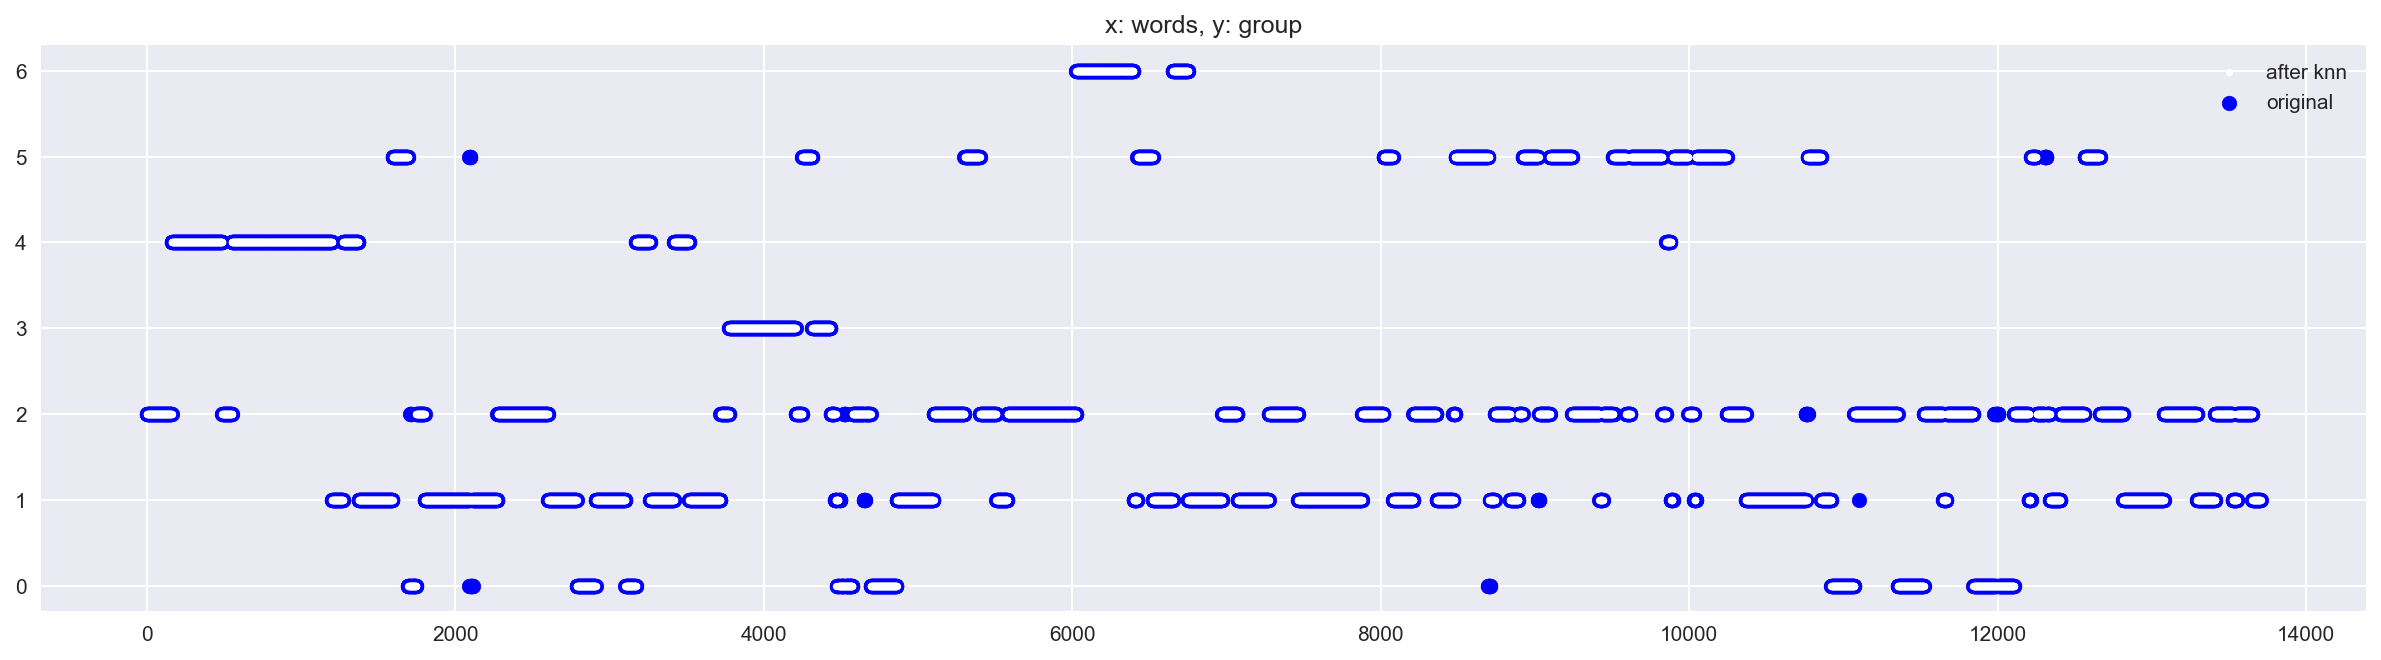

In [12]:
fig = plt.figure(figsize=(20, 5), dpi=150)
plt.scatter(x=range(data[0]['app_freq_f'].shape[0]), y=kmeans.labels_, color='b', label='original')
plt.plot(knn_mean(kmeans.labels_, 40), 'w.', label='after knn')
plt.title('x: words, y: group')
plt.legend()
plt.show()

In [174]:
fig.savefig('1.jpeg')

In [145]:
!start ..

>_**In the figure, along the X axis, the entire text is in length. Y-axis cluster**_

## Let's compare the frequent words in each group with our query.

In [13]:
# Sorting words by grooup
for i in range(n_clusters):
    groups = []
    rows = data[0]['app_freq_f'].loc[kmeans.labels_ == i].reset_index()
    for j in range(rows.shape[0]):
        cols = rows.loc[j] >= 1
        groups.extend(rows.columns[cols])
    data[0][f'clus{i}_words'] = list(set(groups))

In [14]:
for i in range(n_clusters):
    words_cl = data[0][f'clus{i}_words']
    print(f'cluster {i+1} len({len(words_cl)})', words_cl[:11])

cluster 1 len(192) ['probabilities', 'extrapolate', 'cifar', 'imagenet', 'log', 'caveats', 'looks', 'input', 'model', 'molecules', 'curve']
cluster 2 len(560) ['guys', 'cifar', 'input', 'drop', 'model', 'arxiv', 'class', 'lowest', 'wiggly', 'conclude', 'trace']
cluster 3 len(558) ['guys', 'sounds', 'cifar', 'add', 'input', 'ensembles', 'visually', 'interfering', 'yeah', 'fail', 'interested']
cluster 4 len(64) ['imperceptible', 'seven', 'column', 'randomly', 'imagenet', 'gradient', 'looks', 'maxnorm', 'row', 'dot', 'represent']
cluster 5 len(182) ['topic', 'computer', 'modify', 'log', 'looks', 'input', 'barely', 'strangers', 'detectors', 'believes', 'computing']
cluster 6 len(267) ['svms', 'metamind', 'cue', 'suggestive', 'tails', 'modify', 'imagenet', 'manipulation', 'berkeley', 'input', 'ensembles']
cluster 7 len(67) ['forcing', 'tap', 'rewards', 'cue', 'randomly', 'knocking', 'metaphor', 'happening', 'apple', 'clever', '90%']


## Importing NN model to calculate cosine difference

In [15]:
import spacy
# spacy english model (large)
nlp = spacy.load('en_core_web_lg')

def similarity_calc(search_words, subtitles):
    search = nlp(search_words)
    sim = search.similarity(nlp(' '.join(subtitles)))
    return sim

In [16]:
for i in range(n_clusters):
    data[0][f'clus{i}_similarity'] = similarity_calc(search, data[0][f'clus{i}_words'])
    print(f'Cluster {i} similarity:', data[0][f'clus{i}_similarity'])

Cluster 0 similarity: 0.6628078458594866
Cluster 1 similarity: 0.6508480450979034
Cluster 2 similarity: 0.6759960332865703
Cluster 3 similarity: 0.5662789923407485
Cluster 4 similarity: 0.6620042697371997
Cluster 5 similarity: 0.6470780294446611
Cluster 6 similarity: 0.6731211856642033


In [21]:
data[0].keys()

dict_keys(['app_freq', 'app_freq_f', 'most_app', 'most_words', 'text_part', 'text_part_pos', 'clus0_words', 'clus1_words', 'clus2_words', 'clus3_words', 'clus4_words', 'clus0_similarity', 'clus1_similarity', 'clus2_similarity', 'clus3_similarity', 'clus4_similarity'])

# Now we choising best parts relatively to our query

In [17]:
# kmeans.labels_, data[0]['text_part'...]:dict
def _clusters2parts(labels, data, threshold = 0.6): 
    clusters = []
    # gathering best clusters
    for i in range(max(labels)):
        if data[f'clus{i}_similarity'] > threshold:
            clusters.append(i)

    # finding parts in text for each cluster
    lable_array = knn_mean(labels, 40)
    best_parts = []

    start = False
    lable = -1
    start_ind = 0

    # choising and connectiong text parts acording labels
    for i in range(len(lable_array)):
#         print(f'{i} l:{lable_array[i]} st:{start_ind} in:{lable_array[i] in clusters} start:({start})')
        if lable_array[i] == lable:
            continue
        else:
            if lable_array[i] in clusters:
                lable = lable_array[i]
                if not start:
                    start_ind = i
                    start = True

            else:
                lable = -1
                if start:
                    start = False
                    best_parts.append((start_ind, i-1))
        
    if start:
        best_parts.append((start_ind, len(lable_array)-1))
    
    # if text from youtube subtitles, so he divided to parts with timings
    parts_in_subtitles = []
    if 'text_part' in data.keys():
        for part in best_parts:
            start = data['text_part'][part[0]]
#             print(f'{part[1] = }')
            end = data['text_part'][part[1]]
            parts_in_subtitles.append((start, end))
        
#         coef_ = len(data['text_part'])/len(lable_array)
#         new_parts = []
#         new_sub_parts = []
#         for part in range(len(best_parts)):
#             start = int(best_parts[part][0]*coef_)
#             end = int(best_parts[part][1]*coef_)
#             new_parts.append((start, end))
            
#             start = int(parts_in_subtitles[part][0]*coef_)
#             end = int(parts_in_subtitles[part][1]*coef_)
#             new_sub_parts.append((start, end))
            
#         best_parts = new_parts
#         parts_in_subtitles = new_sub_parts
        
    return best_parts, parts_in_subtitles

In [18]:
best_parts, sub_parts = _clusters2parts(kmeans.labels_, data[0])
best_parts

[(0, 3775), (4207, 4313), (4433, 6026), (6397, 6652), (6751, 13704)]

In [19]:
sub_parts

[(0, 493), (553, 567), (582, 802), (854, 890), (904, 1852)]

In [20]:
# parts of text to timings
# dfs[0]
def _parts2timings(sub_parts, yt_subtitles):
    timings = []
    for part in sub_parts:
    #     print(part)
        start = yt_subtitles.loc[part[0], 'start']
        end = yt_subtitles.loc[part[1], 'start'] + yt_subtitles.loc[part[1], 'duration']
        timings.append((start, end))
    return timings

In [21]:
timings = _parts2timings(sub_parts, dfs[0])
timings

[(8.407, 1343.2),
 (1481.467, 1511.5149999999999),
 (1548.663, 2106.796),
 (2241.177, 2333.7309999999998),
 (2368.498, 4892.258)]

In [124]:
def get_best_parts(data, query, yt_subtitles=None):
    docs_num = len(data)
    
    # kmeans labels 
    print('\rkmeans labels. part 1 of 4', end=' '*15)
    kmeans_labels = []
    n_clusters = 7
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    for i in range(docs_num):
        kmeans.fit(data[i]['app_freq_f']) #.mask(data[0]['app_freq_f'] > 0, 1))
        labels = knn_mean(kmeans.labels_, 30)
        kmeans_labels.append(labels)
        data[i]['labels'] = labels
        
        
    # grouping words in each group
    print('\rgrouping words in each group. part 2 of 4', end=' '*10)
    for i in range(docs_num):
        for k in range(n_clusters):
            groups = []
            rows = data[i]['app_freq_f'].loc[kmeans_labels[i] == k].reset_index()
            for j in range(rows.shape[0]):
                cols = rows.loc[j] >= 1
                groups.extend(rows.columns[cols])
            data[i][f'clus{k}_words'] = list(set(groups))
#             print('==', len(data[i][f'clus{i}_words']))
        
    # nlp similarity
    print('\rnlp similarity. part 3 of 4', end=' '*15)
    # spacy english model (large)
    nlp = spacy.load('en_core_web_lg')
    search_nlp = nlp(query)
    for i in range(docs_num):
        for k in range(n_clusters):
            sim = search_nlp.similarity(nlp(' '.join(data[i][f'clus{k}_words'])))
            data[i][f'clus{k}_similarity'] = sim
            
    
    # from labels and similarity getting text parts
    limit = 0.6
    print(f'\rfrom labels and similarity({limit = }) getting best text parts. part 4 of 4', end='')
    best_parts = []
    sub_parts = []
    for i in range(docs_num):
        best_part, sub_part = _clusters2parts(kmeans_labels[i], data[i], threshold=limit)
        best_parts.append(best_part)
        sub_parts.append(sub_part)
    
    best_part_timings = []
    if 'text_part' in data[0].keys() and yt_subtitles:
        # getting timings
        for i in range(docs_num):
            best_part_timings.append(_parts2timings(sub_parts[i], yt_subtitles[i]))
    print('\rTimings builded', end=' '*65)
    print()
        
    return best_parts, best_part_timings

In [184]:
best_part, best_part_timings = get_best_parts(data, search, dfs)
best_part

Timings builded                                                                 


[[(0, 2114),
  (2409, 2537),
  (2798, 4080),
  (4183, 4297),
  (4593, 7702),
  (7908, 8710),
  (8843, 10832),
  (10933, 13482),
  (13585, 13704)]]

In [119]:
best_part_timings

[[(2.31, 279.64), (325.03, 396.74), (442.01, 825.73)]]

In [185]:
data[0].keys()

dict_keys(['app_freq', 'app_freq_f', 'most_app', 'most_words', 'text_part', 'text_part_pos', 'labels', 'clus0_words', 'clus1_words', 'clus2_words', 'clus3_words', 'clus4_words', 'clus5_words', 'clus6_words', 'clus0_similarity', 'clus1_similarity', 'clus2_similarity', 'clus3_similarity', 'clus4_similarity', 'clus5_similarity', 'clus6_similarity'])

In [197]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 7ECB-C49E

 Directory of D:\Programming\Jupyter\Information retrieval\work\part1

02.07.2021  00:54    <DIR>          .
02.07.2021  00:54    <DIR>          ..
06.06.2021  20:46    <DIR>          .ipynb_checkpoints
02.07.2021  00:36           157я673 1.jpeg
02.07.2021  00:07            94я208 ngrams.db
02.07.2021  00:42             5я801 ngrams.py
02.07.2021  00:49           581я386 Part1.ipynb
06.06.2021  21:50            98я995 result_analyse.ipynb
02.07.2021  00:42           598я496 result_best_ind_0.csv
02.07.2021  00:42         1я166я891 result_best_words_0.csv
02.07.2021  00:42       104я603я510 result_words_0.csv
01.07.2021  21:54               817 test.py
01.06.2021  23:34             1я916 title_builder.py
02.07.2021  00:54             7я467 title_builder2.py
02.07.2021  00:54    <DIR>          __pycache__
              11 File(s)    107я317я160 bytes
               4 Dir(s)  176я407я506я944 bytes free
